In [ ]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import textwrap

df = pd.read_csv('https://storage.googleapis.com/hk4417_dse6000_hoassignment/Covid_Data.csv', encoding="ISO-8859-1")

In [ ]:
df['country'].mode()

0    Ethiopia
dtype: object

**Hypothesis**

During the initial review of the data, I was more interested on the relation between gdp, time and vaccination status. What I am looking to find out is what the relation, if any, there was between the amount of time that has passed, the country people were from and the average gdp would be.

I hypothesis that there will be a stronger relation of vaccinations in weathier countries and the number of vaccinations will increase as time moves on and supply becomes abundant.

In [ ]:
df['GDP_pc'].describe()

count    120240.000000
mean       8852.168671
std        7100.677315
min         941.000000
25%        2661.000000
50%        7252.000000
75%       12616.000000
max       33185.000000
Name: GDP_pc, dtype: float64

**Summary**

I wanted to see within the dataset before diving in what the general statistics for the data would be. By taking the general stats of the GDP column for the entire dataset I was hoping to find a good range in here. 

In [ ]:
explore = df.groupby('country').agg({'GDP_pc': 'mean'})
explore.sort_values(['GDP_pc'], ascending=[False])
explore.reset_index()

,country,GDP_pc
0,Afghanistan,2065.0
1,Antigua and Barbuda,21850.0
2,Argentina,22066.0
3,Armenia,13654.0
4,Bangladesh,4754.0
...,...,...
79,Uzbekistan,7348.0
80,Vietnam,8041.0
81,West Bank and Gaza,6245.0
82,Zambia,3470.0


**Summary**

After exploring a little bit more within the data I found that this data isnt accurate or worth exploring. The data is not accurately captured and converted to common currency value. This ended the exploration for correlation between wealth and vaccination status. Not only was the data not properly represented, there were no indicators to show what currency it was recording which immediately disqualifies the dataset from being properly analyzed.

**Revised Hypothesis**

The adjusted hypothesis is that there will be a visible correlation between the amount of time that has passed and the amount of vaccines that have been administered as well as more poor countries would have been affected more

In [ ]:
df['record_count'] = 1
country_count = df.groupby('country').agg({'record_count': 'count'}).reset_index()
country_count.nlargest(5, 'record_count')

,country,record_count
26,Ethiopia,6098
10,Burkina Faso,4597
55,Nigeria,4422
77,Uganda,3620
44,Malawi,3595


**Summary**

I wanted to explore to see what the heaviest hit countries from COVID were based on the data that we were presented with. Since the data was based on polling the assumption is that this is a subset of a much larger dataset that is currently not avaliable to the public

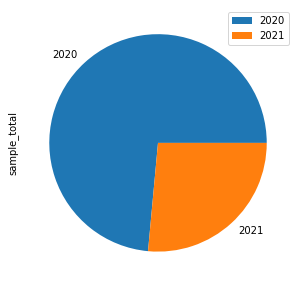

In [ ]:
year_group = df.groupby('year').agg({'sample_total':'sum'})
plot = year_group.plot.pie(y='sample_total', figsize=(5, 5))

**Summary**

Breaking down the total sample size to represent what the total 
make up is by year. We see  that the majority of the polling was done in the year 2020

In [ ]:
def vax_cleanup(df):
  y = df[df['indicator'] == 'Vac_done']
  x = y.copy()
  x['percentage_vaccinated'] = (x['sample_subset']/x['sample_total']) *100 
  x['month'] = x['month'].astype('int')
  x['date'] = x['month'].astype('str') + '-'+ x['year'].astype('str')
  x['date'] = pd.to_datetime(x['date'], format='%m-%Y')
  return x

**Summary**

This was a function that I created to help massage the data to the format that I wanted and would be reusing a few times. I wanted to filter specifically to where the indicator specified that the vaccine was taken, create another column with the calculated percentage of respondants based on the sample size and cast the month and year as a proper date format for later graphs and analysis

In [ ]:
vax_status = vax_cleanup(df)

percentage = vax_status['percentage_vaccinated'].astype('category').cat.codes
development = vax_status['urban_rural'].astype('category').cat.codes

vax_correlation = percentage.corr(development)
vax_correlation

relation = vax_status.groupby('urban_rural').agg({'percentage_vaccinated': 'mean'})
relation['percentage_vaccinated'] = relation['percentage_vaccinated']/100
relation.style.format("{:.2%}")

,percentage_vaccinated
urban_rural,
National,36.32%
Rural,15.60%
Urban,25.00%


**Summary**

Attempting to see if there is a clear correlation between the percentage of 
the sample population vaccinated and if they live in a rural or urban area

In [ ]:
frame_count = df[['region_code', 'region']]\
              .groupby('region_code')\
              .agg({'region' : 'count'})\
              .reset_index()
frame_count.rename(columns={"region": "region_count"})
frame_plot = df[['region', 'region_code']]
frame_plot_graph = frame_count.join(frame_plot.set_index('region_code'),\
                                    on='region_code', how='inner', lsuffix='_count')\
                                    .sort_values(by='region_count', ascending=False)

**Summary**

In order to properly plot the graph I wanted to manually create a smaller dataframe with the data of interest. I had taken the counts of each of the occurances of the region. After I had aggregated the data it was joined back to the dataframe to force the order of the graph below

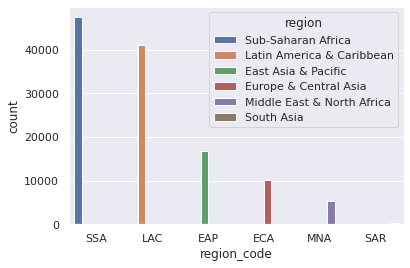

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='region_code', hue='region', data=frame_plot_graph)
sns.move_legend(ax, "upper right")
plt.show()

**Summary**

The histogram here I wanted to show the regions that were affected by COVID based on a count. This graph specifically shows the country region codes, these regions are very broad and require the user to understand what countries are in these regions or to individually pull out the country data point. 

I wanted to focus on the high level regionality of the polls to see what regions were affected the most.

[Text(0, 0, '0'),
 Text(0, 0, '20000'),
 Text(0, 0, '40000'),
 Text(0, 0, '60000'),
 Text(0, 0, '80000'),
 Text(0, 0, '100000')]

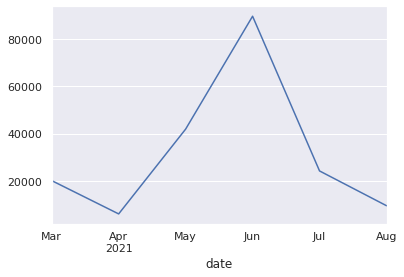

In [ ]:
timeframe_vax = vax_cleanup(df)

ts = pd.Series(timeframe_vax['sample_subset'].values, index=timeframe_vax['date'])
ts2 = ts.resample('M', closed='right', label='right').sum()
ax = ts2.plot()
ax.set_yticklabels(pd.Series(ax.get_yticks()).map(lambda x: '{:.0f}'.format(x)))

**Summary**

This graph represents the amount of the surveyed population that responded indicating that they had gotten the vaccine. The goal here was to show if there was a trend that the longer time that had passed the more vaccines that were administered. 

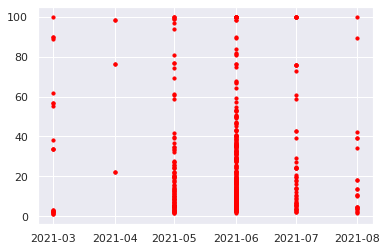

In [ ]:
"""
Correlation between vaccine acceptance and month/year
"""
timeframe_vax_corr = timeframe_vax.copy()
timeframe_vax_corr = timeframe_vax_corr[timeframe_vax_corr['percentage_vaccinated'] != None]
plt.scatter(timeframe_vax_corr['date'], timeframe_vax_corr['percentage_vaccinated'], s =10, c = 'red')

**Summary**

Showing a distribution of the vaccines administered by month. As time goes by we can see that there are more vaccines taken however after plotting the data in a distributed manner we can see that there are more data points that trend towards the lower percentages with more solid lines.

**Overall Conclusion**

The conclusion of my exploration shows that due to the incomplete dataset that there appears to be no relation between gdp and vaccine status, but I was able to see a distinct relation between the number of vaccines administered the longer time that had passed. Given a more structured and complete dataset, additional stronger conclusions could have been made and more evidence could have been presented.